# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Riyan Zaenal Arifin
- **Email:** riyanzaenal411@gmail.com
- **ID Dicoding:** A327YBF437

## Menentukan Pertanyaan Bisnis

- Bagaimana demografi dari customer.?
- Kategori produk apa yang paling banyak dan paling sedikit dibeli oleh customer.?
- Produk apa yang paling banyak dan paling sedikit dibeli oleh customer.?
- Bagaimana performa dan revenue penjualan sepanjang tahun 2017.?
- Type Pembayaran apa yang paling banyak digunakan customer.?
- Seller mana yang mendapatkan skor riview bintang 5 paling banyak dan paling sedikit.?
- Seller mana yang memilki jumlah skor riview bintang 1 lebih banyak dibanding bintang 5.?
- Bagaimana status orderan dari pelanggan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geobr
import pkg_resources

/tmp/ipykernel_8452/3933539186.py:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


## Data Wrangling

### Gathering Data

#### Buat untuk membuka file csv

In [2]:
def dataset(path):
    df = pd.read_csv(path)
    return df

#### Gunakan fungsi untuk membuka file csv

In [3]:
df_customers_dataset = dataset('/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/data/customers_dataset.csv')
df_geolocation_dataset = dataset('/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/data/geolocation_dataset.csv')
df_order_items_dataset = dataset('/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/data/order_items_dataset.csv')
df_order_payments_dataset = dataset('/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/data/order_payments_dataset.csv')
df_order_reviews_dataset = dataset('/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/data/order_reviews_dataset.csv')
df_orders_dataset = dataset('/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/data/orders_dataset.csv')
df_product_category_name_translation = dataset('/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/data/product_category_name_translation.csv')
df_products_dataset = dataset('/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/data/products_dataset.csv')
df_sellers_dataset = dataset('/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/data/sellers_dataset.csv')

#### Melihat bentuk dataset df_customers_dataset

In [4]:
df_customers_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


#### Melihat bentuk dataset df_geolocation_dataset

In [5]:
df_geolocation_dataset

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


#### Melihat bentuk dataset df_order_items_dataset

In [6]:
df_order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


#### Melihat bentuk dataset df_order_payments_dataset

In [7]:
df_order_payments_dataset

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


#### Melihat bentuk dataset df_order_reviews_dataset

In [8]:
df_order_reviews_dataset

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


#### Melihat bentuk dataset df_orders_dataset

In [9]:
df_orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


#### Melihat bentuk dataset df_product_category_name_translation

In [10]:
df_product_category_name_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


#### Melihat bentuk dataset df_products_dataset

In [11]:
df_products_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


#### Melihat bentuk dataset df_sellers_dataset

In [12]:
df_sellers_dataset

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


**Insight:**
- Total customer ada sebanyak 99441
- Secara total terdapat 112650 oderan untuk satuan
- Terdapat 99441 orderan
- Dari 99441 orderan, 99224 orderan diberi skor review oleh customer
- Terdapat 71 kategori produk
- Dari 71 kategori produk, terdapat 32951 produk
- Terdapat 3095 penjual

### Assessing Data

#### Missing Value 

##### Buat fungsi untuk melihat data missing

In [13]:
def missing_values(df):
    # Masukan nilai yang memungkinkan missing
    missing_values = ['', ' ', 'NaN', 'Nan', 'nan','NULL','Null','null','N/A','n/a', '.', ',','-','--','---', 'TIDAK ADA DATA', 'KOSONG']
    col_names = list(df.columns)
    df[col_names] = df[col_names].replace(missing_values, np.nan)

    # Hitung jumlah data yang kosong
    missing_values = df.isnull().sum()
    missing_values = pd.DataFrame(missing_values, columns=['count'])
    missing_values.reset_index(inplace=True)
    return missing_values

##### Missing value pada dataset df_customers_dataset

In [14]:
missing_values(df_customers_dataset)

,index,count
0,customer_id,0
1,customer_unique_id,0
2,customer_zip_code_prefix,0
3,customer_city,0
4,customer_state,0


##### Missing value pada dataset df_geolocation_dataset

In [15]:
missing_values(df_geolocation_dataset)

,index,count
0,geolocation_zip_code_prefix,0
1,geolocation_lat,0
2,geolocation_lng,0
3,geolocation_city,0
4,geolocation_state,0


##### Missing value pada dataset df_order_items_dataset

In [16]:
missing_values(df_order_items_dataset)

,index,count
0,order_id,0
1,order_item_id,0
2,product_id,0
3,seller_id,0
4,shipping_limit_date,0
5,price,0
6,freight_value,0


##### Missing value pada dataset df_order_payments_dataset

In [17]:
missing_values(df_order_payments_dataset)

,index,count
0,order_id,0
1,payment_sequential,0
2,payment_type,0
3,payment_installments,0
4,payment_value,0


##### Missing value pada dataset df_order_reviews_dataset

In [18]:
missing_values(df_order_reviews_dataset)

,index,count
0,review_id,0
1,order_id,0
2,review_score,0
3,review_comment_title,87670
4,review_comment_message,58311
5,review_creation_date,0
6,review_answer_timestamp,0


##### Missing value pada dataset df_orders_dataset

In [19]:
missing_values(df_orders_dataset)

,index,count
0,order_id,0
1,customer_id,0
2,order_status,0
3,order_purchase_timestamp,0
4,order_approved_at,160
5,order_delivered_carrier_date,1783
6,order_delivered_customer_date,2965
7,order_estimated_delivery_date,0


##### Missing value pada dataset df_product_category_name_translation

In [20]:
missing_values(df_product_category_name_translation)

,index,count
0,product_category_name,0
1,product_category_name_english,0


##### Missing value pada dataset df_products_dataset

In [21]:
missing_values(df_products_dataset)

,index,count
0,product_id,0
1,product_category_name,610
2,product_name_lenght,610
3,product_description_lenght,610
4,product_photos_qty,610
5,product_weight_g,2
6,product_length_cm,2
7,product_height_cm,2
8,product_width_cm,2


##### Missing value pada dataset df_sellers_dataset

In [22]:
missing_values(df_sellers_dataset)

,index,count
0,seller_id,0
1,seller_zip_code_prefix,0
2,seller_city,0
3,seller_state,0


### Data Duplikat

In [23]:
print("Jumlah duplikasi df_customers_dataset: ", df_customers_dataset.duplicated().sum())
print("Jumlah duplikasi df_geolocation_dataset: ", df_geolocation_dataset.duplicated().sum())
print("Jumlah duplikasi df_order_items_dataset: ", df_order_items_dataset.duplicated().sum())
print("Jumlah duplikasi df_order_payments_dataset: ", df_order_payments_dataset.duplicated().sum())
print("Jumlah duplikasi df_order_reviews_dataset: ", df_order_reviews_dataset.duplicated().sum())
print("Jumlah duplikasi df_orders_dataset: ", df_orders_dataset.duplicated().sum())
print("Jumlah duplikasi df_product_category_name_translation: ", df_product_category_name_translation.duplicated().sum())
print("Jumlah duplikasi df_products_dataset: ", df_products_dataset.duplicated().sum())
print("Jumlah duplikasi df_sellers_dataset: ", df_sellers_dataset.duplicated().sum())

Jumlah duplikasi df_customers_dataset:  0
Jumlah duplikasi df_geolocation_dataset:  261831
Jumlah duplikasi df_order_items_dataset:  0
Jumlah duplikasi df_order_payments_dataset:  0
Jumlah duplikasi df_order_reviews_dataset:  0
Jumlah duplikasi df_orders_dataset:  0
Jumlah duplikasi df_product_category_name_translation:  0
Jumlah duplikasi df_products_dataset:  0
Jumlah duplikasi df_sellers_dataset:  0


### Tipe data tanggal

#### df_order_items_dataset

In [24]:
df_order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#### df_order_reviews_dataset

In [25]:
df_order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11554 non-null  object
 4   review_comment_message   40913 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


#### df_orders_dataset

In [26]:
df_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**
- Pada df_order_reviews_dataset terdapat data kosong pada kolom review_comment_title dan review_comment_message
- Pada df_order_dataset terdapat data kosong pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date
- Pada df_products_dataset hanya kolom product_id yang tidak memiliki data kosong
- Data duplikat hanya ada pada df_geolocation_dataset sebanyak 261831
- Semua tipe data tanggal pada df_order_items_dataset, df_order_reviews_dataset, dan df_orders_dataset adalah bertipe object

### Cleaning Data

#### Drop Missing

In [27]:
df_order_reviews_dataset.dropna(axis=0, inplace=True)
df_orders_dataset.dropna(axis=0, inplace=True)
df_products_dataset.dropna(axis=0, inplace=True)

In [28]:
missing_values(df_order_reviews_dataset)

,index,count
0,review_id,0
1,order_id,0
2,review_score,0
3,review_comment_title,0
4,review_comment_message,0
5,review_creation_date,0
6,review_answer_timestamp,0


In [29]:
missing_values(df_orders_dataset)

,index,count
0,order_id,0
1,customer_id,0
2,order_status,0
3,order_purchase_timestamp,0
4,order_approved_at,0
5,order_delivered_carrier_date,0
6,order_delivered_customer_date,0
7,order_estimated_delivery_date,0


In [30]:
missing_values(df_products_dataset)

,index,count
0,product_id,0
1,product_category_name,0
2,product_name_lenght,0
3,product_description_lenght,0
4,product_photos_qty,0
5,product_weight_g,0
6,product_length_cm,0
7,product_height_cm,0
8,product_width_cm,0


#### Drop Duplikat

In [31]:
df_geolocation_dataset.drop_duplicates(inplace=True)
print("Jumlah duplikasi df_geolocation_dataset: ", df_geolocation_dataset.duplicated().sum())

Jumlah duplikasi df_geolocation_dataset:  0


### Mengubah tipe data tanggal

In [32]:
def date(tabel, kolom):
    tabel[kolom] = pd.to_datetime(tabel[kolom], format='%Y-%m-%d %H:%M:%S', errors='coerce')
    return tabel

#### df_order_items_dataset

In [33]:
df_order_items_dataset = date(df_order_items_dataset,'shipping_limit_date')
df_order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### df_order_reviews_dataset

In [34]:
df_order_reviews_dataset =  date(df_order_reviews_dataset, 'review_creation_date') 
df_order_reviews_dataset =  date(df_order_reviews_dataset, 'review_answer_timestamp')
df_order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9820 entries, 9 to 99200
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                9820 non-null   object        
 1   order_id                 9820 non-null   object        
 2   review_score             9820 non-null   int64         
 3   review_comment_title     9820 non-null   object        
 4   review_comment_message   9820 non-null   object        
 5   review_creation_date     9820 non-null   datetime64[ns]
 6   review_answer_timestamp  9820 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 613.8+ KB


### df_orders_dataset

In [35]:
df_orders_dataset =  date(df_orders_dataset,'order_purchase_timestamp')
df_orders_dataset =  date(df_orders_dataset,'order_approved_at')
df_orders_dataset =  date(df_orders_dataset,'order_delivered_carrier_date')
df_orders_dataset =  date(df_orders_dataset,'order_delivered_customer_date')	
df_orders_dataset =  date(df_orders_dataset,'order_estimated_delivery_date') 
df_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


**Insight:**
- Pada df_order_reviews_dataset sudah tidak terdapat data kosong 
- Pada df_order_dataset sudah tidak terdapat data kosong 
- Pada df_products_dataset sudah tidak terdapat data kosong
- Pada df_geolocation_dataset sudah tidak ada data yang duplikat
- Tipe data tanggal pada df_order_items_dataset, df_order_reviews_dataset, dan df_orders_dataset sudah bertipe tanggal

### Menyimpan data

In [36]:
def save_data (df,name):
    df.to_pickle(f'/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/dashboard/Data Clean/{name}.pkl')

In [37]:
save_data(df_customers_dataset, "df_customers_dataset")
save_data(df_geolocation_dataset, "df_geolocation_dataset")
save_data(df_order_items_dataset, "df_order_items_dataset")
save_data(df_order_payments_dataset, "df_order_payments_dataset")
save_data(df_order_reviews_dataset, "df_order_reviews_dataset")
save_data(df_orders_dataset, "df_orders_dataset")
save_data(df_product_category_name_translation, "df_product_category_name_translation")
save_data(df_products_dataset, "df_products_dataset")
save_data(df_sellers_dataset, "df_sellers_dataset")

## Exploratory Data Analysis (EDA)

### Explore df_customers_dataset

In [38]:
df_customers_dataset.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


### Explore df_geolocation_dataset

In [39]:
df_geolocation_dataset.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


### df_order_items_dataset

In [40]:
df_order_items_dataset.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


### df_order_payments_dataset

In [41]:
df_order_payments_dataset.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


### df_order_reviews_dataset

In [42]:
df_order_reviews_dataset.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,9820,9820,9820.000000,9820,9820,9820,9820
unique,9779,9811,NaN,4119,9016,NaN,NaN
top,08528f70f579f0c830189efc523d2182,27dc874d0fc1a19c74ec77ca706be968,NaN,Recomendo,Muito bom,NaN,NaN
freq,3,2,NaN,353,63,NaN,NaN
mean,NaN,NaN,3.835743,NaN,NaN,2018-06-27 20:35:26.272912384,2018-07-01 10:32:41.198268928
min,NaN,NaN,1.000000,NaN,NaN,2017-05-16 00:00:00,2018-04-26 12:56:00
25%,NaN,NaN,3.000000,NaN,NaN,2018-05-22 00:00:00,2018-05-24 17:36:14.500000
50%,NaN,NaN,5.000000,NaN,NaN,2018-06-27 00:00:00,2018-06-30 17:07:20.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-08-04 00:00:00,2018-08-06 22:30:15.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-24 21:34:38


### df_orders_dataset

In [43]:
df_orders_dataset.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


### df_product_category_name_translation

In [44]:
df_product_category_name_translation.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### df_products_dataset

In [45]:
df_products_dataset.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


### df_sellers_dataset

In [46]:
df_sellers_dataset.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**Insight:**
- Pada dataset df_customers_dataset terlihat bahwa customer paling banyak berasal dari negara bagian SP dengan 41746 customer dengan 15540 di antaranya berasal kota sao paulo.
- Pada dataset df_geolocation_dataset terlihat bahwa titik lokasi paling banyak berasal dari negara bagian SP dengan 285976 titik dengan 79927 di antarnya berasal kota sao paulo.
- Pada dataset df_order_items_dataset terlihat bahwa untuk produk yang paling banyak dibeli adalah produk aca2eb7d00ea1a7b8ebd4e68314663af dengan 527. Sedangkan seller dengan penjualan terbanyak adalah seller	6560211a19b47992c3666cc44a7e94c0 sebanyak 2033.
- Pada df_order_payments_dataset terlihat bahwa tipe pembayaran paling banyak adalah credit_card dengan banyak 76795.
- Pada df_order_reviews_dataset terlihat bahwa judul review komentar paling banyak adalah Recomendo dengan banyak 353 dan review pesan komentar paling banyak adalah Muito bom	 sebanyak 63.
- Pada df_orders_dataset terlihat bahwa status order paling banyak adalah delivered dengan banyak 96455.
- Pada df_products_dataset terlihat bahwa frekuensi kategori produk paling sering dibeli adalah cama_mesa_banho dengan banyak 3029 kali.
- Pada dataset df_sellers_dataset terlihat bahwa seller paling banyak berasal dari negara bagian SP dengan 1849 seller dengan 694 di antranya berasal kota sao paulo.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana demografi dari customer.?

#### Berdasarkan Kota

/tmp/ipykernel_8452/1925020115.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=city.values, y=city.index, palette='viridis')


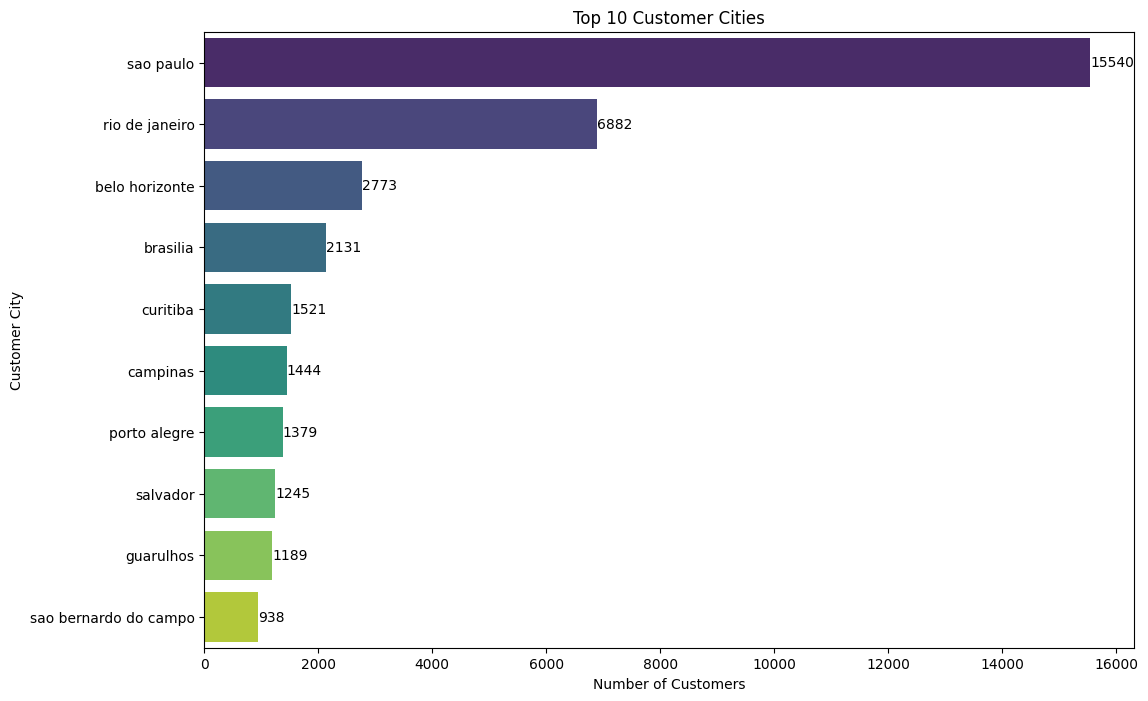

In [47]:
city = df_customers_dataset['customer_city'].value_counts().head(10)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=city.values, y=city.index, palette='viridis')
for i in range(len(city)):
    plt.text(city.values[i], i, city.values[i], color='black', ha='left', va='center')
plt.title('Top 10 Customer Cities')
plt.xlabel('Number of Customers')
plt.ylabel('Customer City')
plt.show()

#### Berdasarkan Negara Bagian

/tmp/ipykernel_8452/1030798781.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=state.values, y=state.index, palette='viridis')


Text(0, 0.5, 'Customer City')

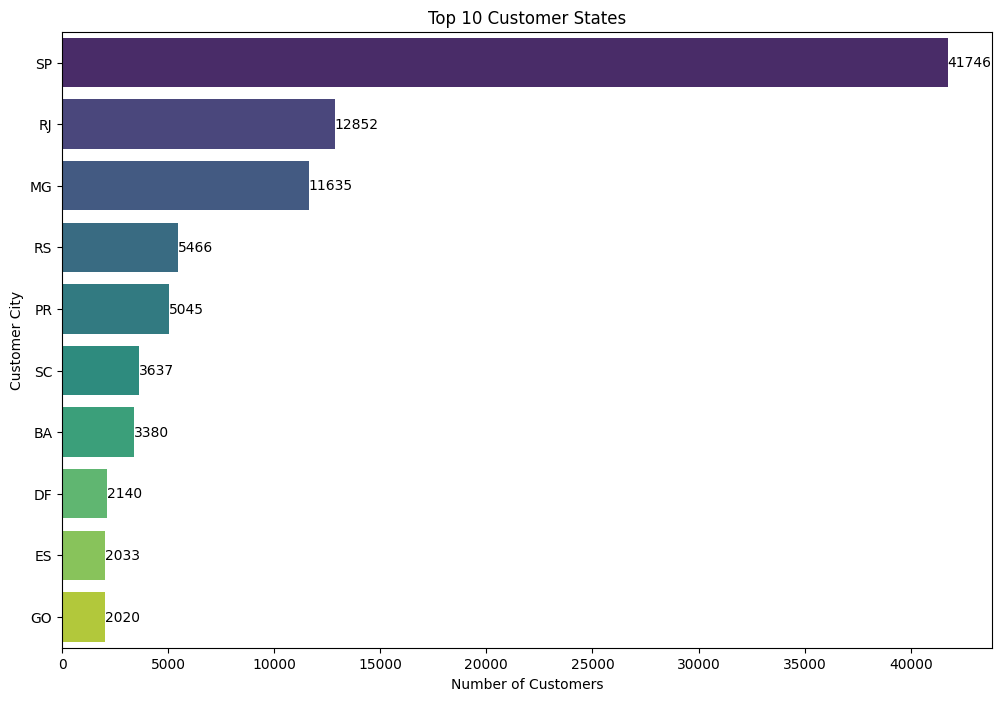

In [48]:
state = df_customers_dataset['customer_state'].value_counts().head(10)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=state.values, y=state.index, palette='viridis')
for i in range(len(state)):
    plt.text(state.values[i], i, state.values[i], color='black', ha='left', va='center')
plt.title('Top 10 Customer States')
plt.xlabel('Number of Customers')
plt.ylabel('Customer City')

### Pertanyaan 2: Kategori produk apa yang paling banyak dan paling sedikit dibeli oleh customer.?

In [49]:
df_merged_category = pd.merge(df_order_items_dataset, df_products_dataset, on='product_id')
save_data(df_merged_category, "df_merged_category")
df_merged_category

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111041,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
111042,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
111043,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
111044,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


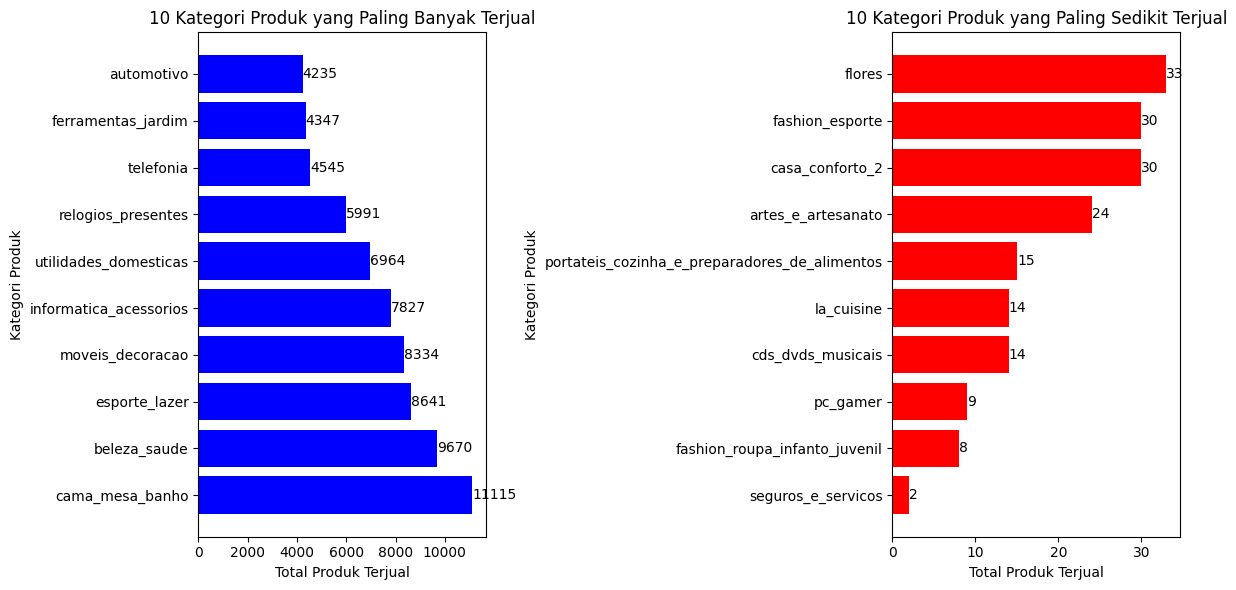

In [50]:
# Menghitung jumlah produk per kategori
kategori_counts = df_merged_category['product_category_name'].value_counts()

# Mengambil 10 kategori produk yang paling banyak
top_10 = kategori_counts.head(10)

# Mengambil 10 kategori produk yang paling sedikit
bottom_10 = kategori_counts.tail(10).sort_values(ascending=True)

# Membuat plot untuk 10 kategori produk yang paling banyak
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Membuat 2 subplot, ini adalah subplot pertama
plt.barh(top_10.index, top_10.values, color='blue')
for i in range(len(top_10)):
    plt.text(top_10.values[i], i, top_10.values[i], color='black', ha='left', va='center')
plt.title('10 Kategori Produk yang Paling Banyak Terjual')
plt.xlabel('Total Produk Terjual')
plt.ylabel('Kategori Produk')

# Membuat plot untuk 10 kategori produk yang paling sedikit
plt.subplot(1, 2, 2)  # Ini adalah subplot kedua
plt.barh(bottom_10.index, bottom_10.values, color='red')
for i in range(len(bottom_10)):
    plt.text(bottom_10.values[i], i, bottom_10.values[i], color='black', ha='left', va='center')
plt.title('10 Kategori Produk yang Paling Sedikit Terjual')
plt.xlabel('Total Produk Terjual')
plt.ylabel('Kategori Produk')

plt.tight_layout()
plt.show()

### Pertanyaan 3: Produk apa yang paling banyak dan paling sedikit dibeli oleh customer.?

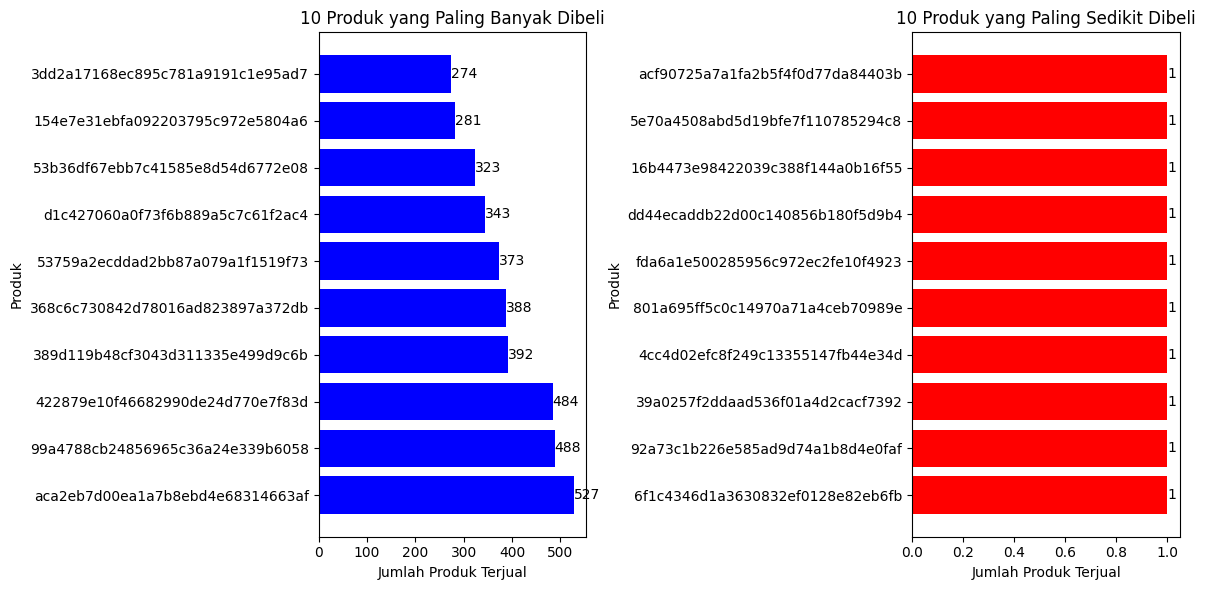

In [51]:
# Menghitung jumlah setiap produk
product_counts = df_merged_category['product_id'].value_counts()

# Mengambil 10 produk yang paling banyak
top_10 = product_counts.head(10)

# Mengambil 10 produk yang paling sedikit
bottom_10 = product_counts.tail(10).sort_values(ascending=True)

# Membuat plot untuk 10 produk yang paling banyak
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Membuat 2 subplot, ini adalah subplot pertama
plt.barh(top_10.index, top_10.values, color='blue')
for i in range(len(top_10)):
    plt.text(top_10.values[i], i, top_10.values[i], color='black', ha='left', va='center')
plt.title('10 Produk yang Paling Banyak Dibeli')
plt.xlabel('Jumlah Produk Terjual')
plt.ylabel('Produk')

# Membuat plot untuk 10 produk yang paling sedikit
plt.subplot(1, 2, 2)  # Ini adalah subplot kedua
plt.barh(bottom_10.index, bottom_10.values, color='red')
for i in range(len(bottom_10)):
    plt.text(bottom_10.values[i], i, bottom_10.values[i], color='black', ha='left', va='center')
plt.title('10 Produk yang Paling Sedikit Dibeli')
plt.xlabel('Jumlah Produk Terjual')
plt.ylabel('Produk')

plt.tight_layout()
plt.show()

### Pertanyaan 4: Bagaimana performa dan revenue penjualan sepanjang tahun 2017.?.?

In [52]:
df_merged_selling = pd.merge(df_order_items_dataset, df_orders_dataset, on='order_id')
save_data(df_merged_selling, "df_merged_selling")
df_merged_selling

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110175,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18
110176,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01
110177,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10
110178,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25


In [53]:

df_2017 = df_merged_selling[df_merged_selling['order_purchase_timestamp'].dt.year == 2017]

monthly_orders_df = df_2017.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi Tahun-Bulan
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_df

/tmp/ipykernel_8452/1396683612.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = df_2017.resample(rule='M', on='order_purchase_timestamp').agg({


,order_purchase_timestamp,order_count,revenue
0,January,748,111712.47
1,February,1641,232638.86
2,March,2546,359198.85
3,April,2303,340669.68
4,May,3545,489159.25
5,June,3135,421923.37
6,July,3872,481604.52
7,August,4193,554699.70
8,September,4149,607220.67
9,October,4478,648247.65


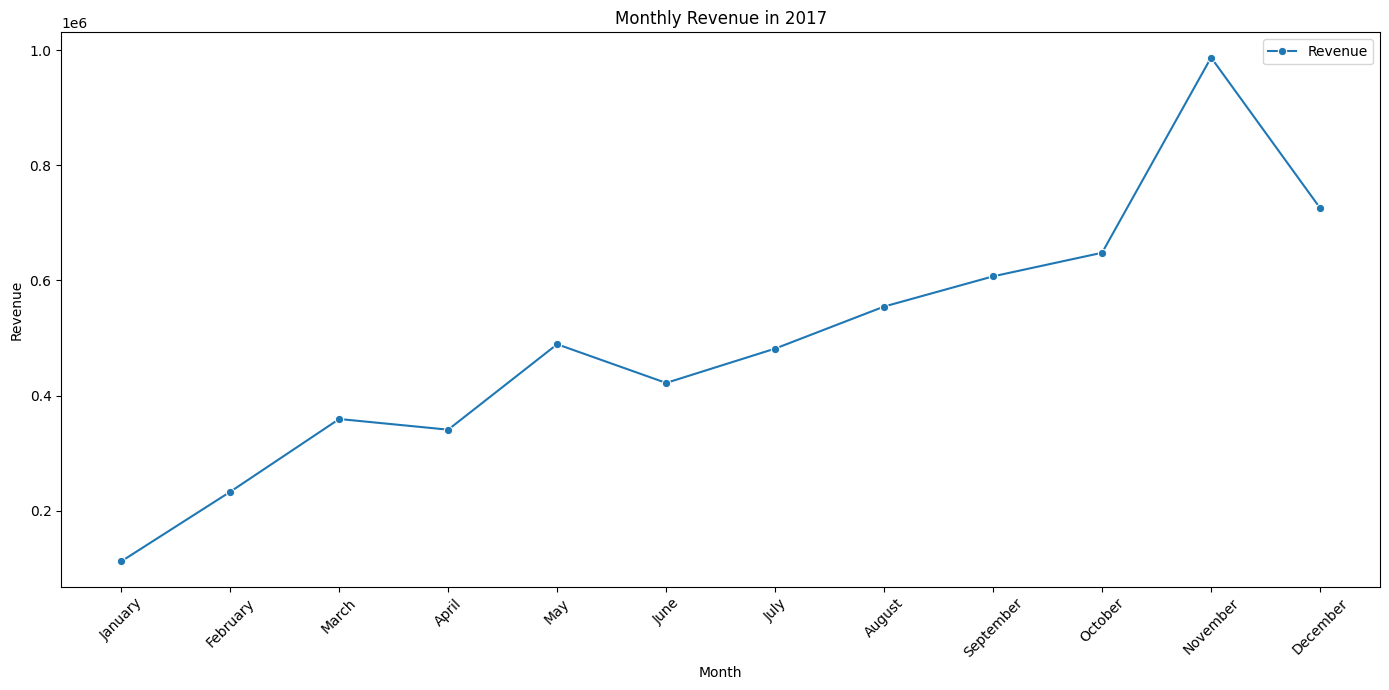

In [54]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='order_purchase_timestamp', y='revenue', data=monthly_orders_df, marker='o', label='Revenue')
plt.title('Monthly Revenue in 2017')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

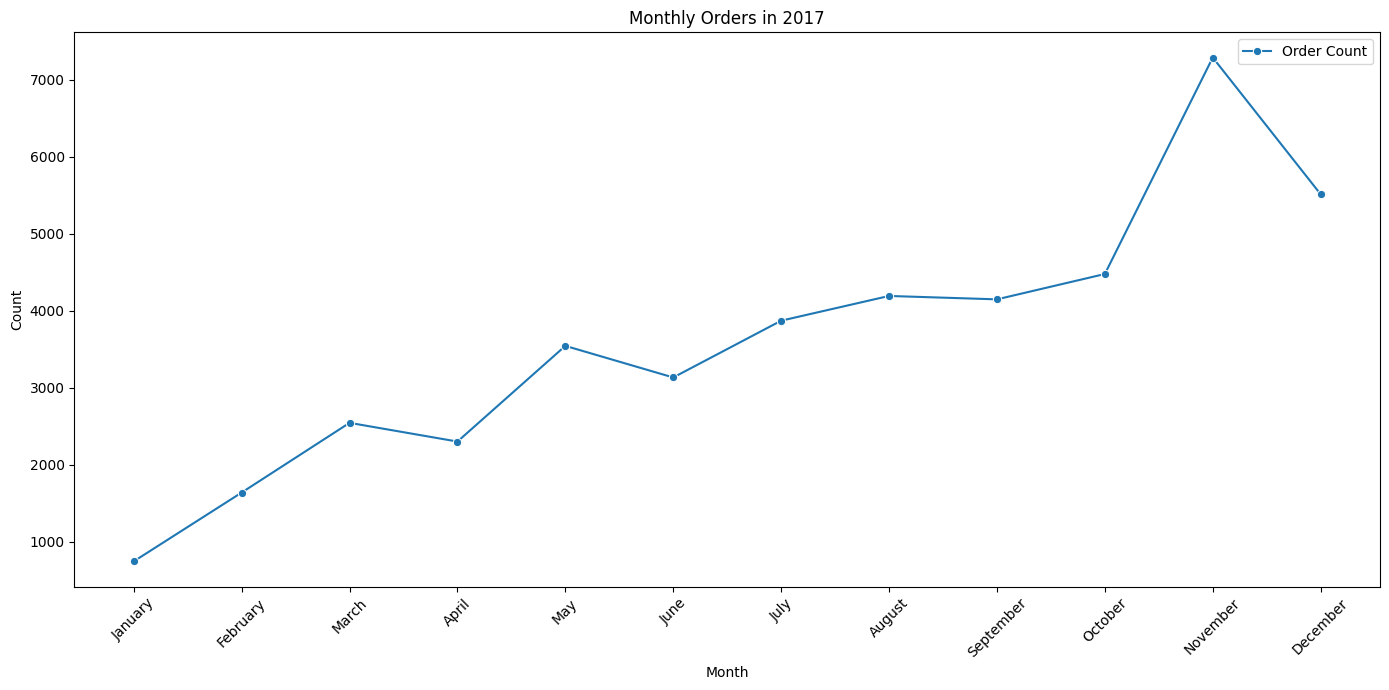

In [55]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='order_purchase_timestamp', y='order_count', data=monthly_orders_df, marker='o', label='Order Count')
plt.title('Monthly Orders in 2017')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Pertanyaan 5: Type Pembayaran apa yang paling banyak digunakan customer.?

/tmp/ipykernel_8452/2342497003.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment.values, y=payment.index, palette='viridis')


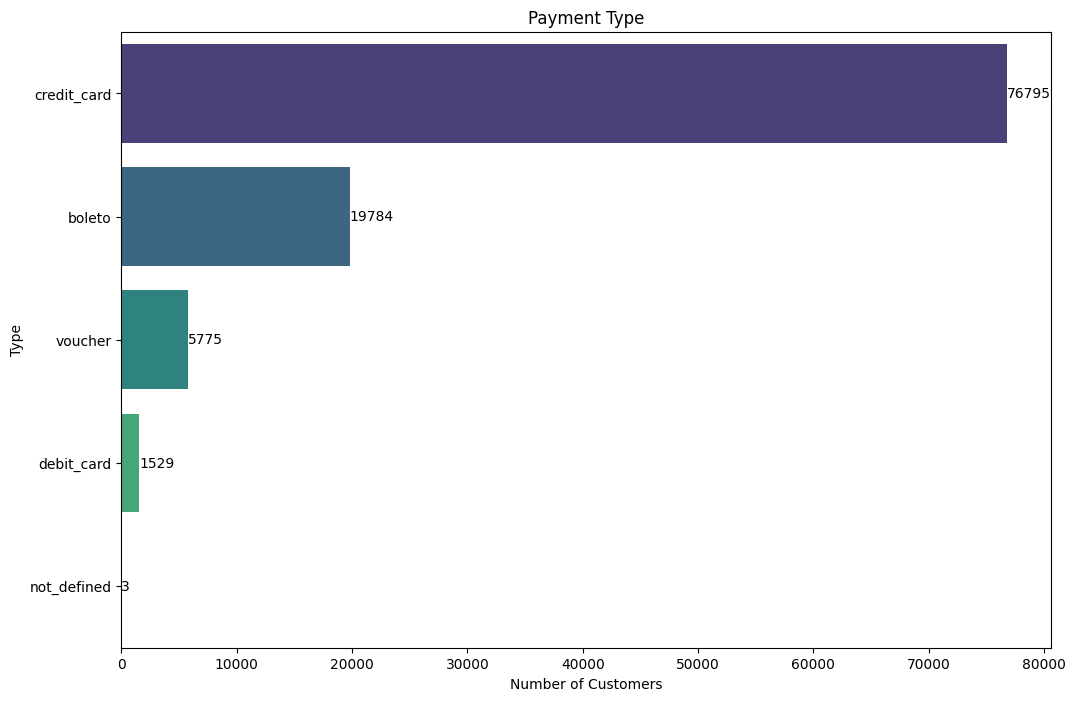

In [56]:
payment = df_order_payments_dataset['payment_type'].value_counts()

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=payment.values, y=payment.index, palette='viridis')
for i in range(len(payment)):
    plt.text(payment.values[i], i, payment.values[i], color='black', ha='left', va='center')
plt.title('Payment Type')
plt.xlabel('Number of Customers')
plt.ylabel('Type')
plt.show()

#### Pertanyaan 6: Seller mana yang mendapatkan skor riview bintang 5 paling banyak dan paling sedikit.?

In [57]:
df_merged_seller = pd.merge(df_order_items_dataset, df_order_reviews_dataset, on='order_id')
save_data(df_merged_seller, "df_merged_seller")
df_merged_seller

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0006ec9db01a64e59a68b2c340bf65a7,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-07-26 17:24:20,74.00,23.32,6322c405c0f34bf3ad870fd1a6b1fced,5,Boa,Excelente serviço de compras on line.,2018-07-31,2018-08-01 23:05:10
1,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.00,8.77,00800678dcf28b0ea0caef2147b6945d,1,produto não entregue,Mudo minha opinião assim que receber o produto...,2018-05-19,2018-05-22 10:52:24
2,00130c0eee84a3d909e75bc08c5c3ca1,1,89321f94e35fc6d7903d36f74e351d40,16090f2ca825584b5a147ab24aa30c86,2018-06-14 05:16:24,27.90,7.94,4ff9a24999699f7104ed23fec2563351,5,Super Recomendo,"Produto entregue adequadamente e muito rápido,...",2018-06-14,2018-06-14 19:50:09
3,001e7cf2ad6bef3ade12ebc56ceaf0f3,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,2018-05-22 10:59:50,35.90,15.20,048baba3f11436d12b06dab572aafc21,1,Pessima,O produto chegou e estragou sozinho,2018-06-05,2018-06-06 19:01:54
4,002175704e8b209f61b9ad5cfd92b60e,1,e6b6e13cf71449a457269f425b89dc74,b2ba3715d723d245138f291a6fe42594,2018-04-26 12:30:57,109.90,13.21,78412bf6c796b43df999fd87750d28ea,4,Recomendo,Produto como descrito. Mas não gostei pq o som...,2018-05-03,2018-05-06 13:42:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,ffd6f465cab015b452d398ac1f5d978a,1,fdcf45aa23bb8312ecc0027d6e1ef1c4,113e3a788b935f48aad63e1c41dac1bd,2018-05-03 09:30:37,7.84,22.06,cb864e5bb7299e87df2bf1eb66fddbcd,4,Ótimo,"O produto chegou antes da data prevista, é tud...",2018-05-04,2018-05-05 01:32:43
11504,ffd6f465cab015b452d398ac1f5d978a,2,fdcf45aa23bb8312ecc0027d6e1ef1c4,113e3a788b935f48aad63e1c41dac1bd,2018-05-03 09:30:37,7.84,22.06,cb864e5bb7299e87df2bf1eb66fddbcd,4,Ótimo,"O produto chegou antes da data prevista, é tud...",2018-05-04,2018-05-05 01:32:43
11505,ffd6f465cab015b452d398ac1f5d978a,3,fdcf45aa23bb8312ecc0027d6e1ef1c4,113e3a788b935f48aad63e1c41dac1bd,2018-05-03 09:30:37,7.84,22.06,cb864e5bb7299e87df2bf1eb66fddbcd,4,Ótimo,"O produto chegou antes da data prevista, é tud...",2018-05-04,2018-05-05 01:32:43
11506,ffe48cb3d8485e0cb0405e21192e592f,1,dd44ecaddb22d00c140856b180f5d9b4,54965bbe3e4f07ae045b90b0b8541f52,2018-07-11 18:30:38,119.90,27.14,3e46e959e03570ecdd743b9736758c54,3,Recomendo,"Encomendem um pouco mais, não tem o tamanho in...",2018-07-13,2018-07-13 18:07:36


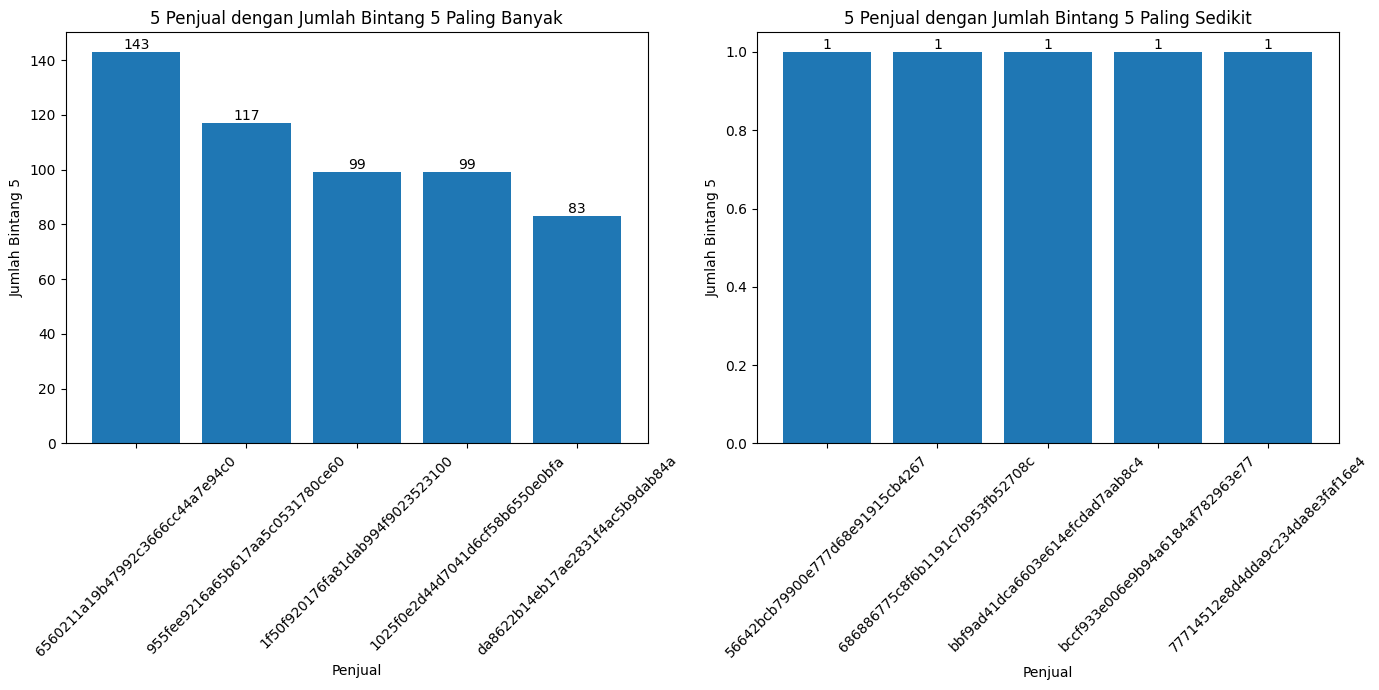

In [58]:
penjual_bintang_5 = df_merged_seller[df_merged_seller['review_score'] == 5]
jumlah_bintang_5_per_penjual = penjual_bintang_5['seller_id'].value_counts()

# Ambil 5 penjual dengan jumlah bintang 5 paling banyak dan paling sedikit
penjual_terbanyak_bintang_5 = jumlah_bintang_5_per_penjual.nlargest(5)
penjual_tersedikit_bintang_5 = jumlah_bintang_5_per_penjual.nsmallest(5)

# Membuat visualisasi
plt.figure(figsize=(14, 7))

# Visualisasi untuk penjual dengan jumlah bintang 5 paling banyak
plt.subplot(1, 2, 1)
bars = plt.bar(penjual_terbanyak_bintang_5.index, penjual_terbanyak_bintang_5.values)
plt.title('5 Penjual dengan Jumlah Bintang 5 Paling Banyak')
plt.xlabel('Penjual')
plt.ylabel('Jumlah Bintang 5')
plt.xticks(rotation=45)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')

# Visualisasi untuk penjual dengan jumlah bintang 5 paling sedikit
plt.subplot(1, 2, 2)
bars = plt.bar(penjual_tersedikit_bintang_5.index, penjual_tersedikit_bintang_5.values)
plt.title('5 Penjual dengan Jumlah Bintang 5 Paling Sedikit')
plt.xlabel('Penjual')
plt.ylabel('Jumlah Bintang 5')
plt.xticks(rotation=45)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
plt.tight_layout()
plt.show()

#### Pertanyaan 7: Seller mana yang memilki jumlah skor riview bintang 1 lebih banyak dibanding bintang 5.?

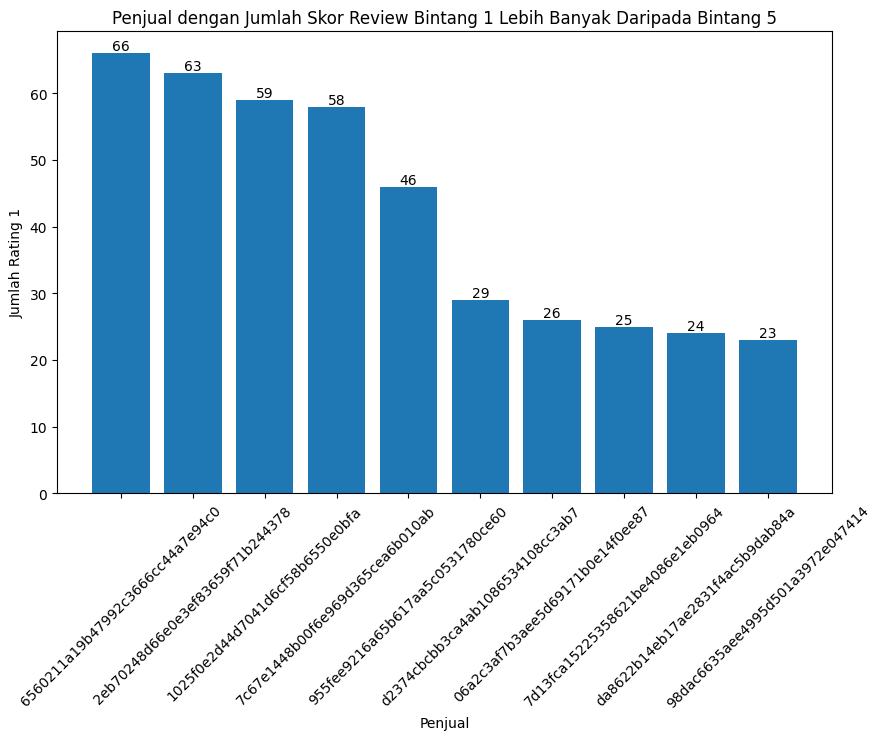

In [59]:
penjual_rating_1 = df_merged_seller[df_merged_seller['review_score'] == 1]
penjual_dengan_rating_1_lebih_dari_5 = penjual_rating_1['seller_id'].value_counts()
penjual_dengan_rating_1_lebih_dari_5 = penjual_dengan_rating_1_lebih_dari_5[penjual_dengan_rating_1_lebih_dari_5 > 5].nlargest(10)

# Membuat visualisasi
plt.figure(figsize=(10, 6))
bars = plt.bar(penjual_dengan_rating_1_lebih_dari_5.index, penjual_dengan_rating_1_lebih_dari_5.values)
plt.title('Penjual dengan Jumlah Skor Review Bintang 1 Lebih Banyak Daripada Bintang 5')
plt.xlabel('Penjual')
plt.ylabel('Jumlah Rating 1')
plt.xticks(rotation=45)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
plt.show()

#### Pertanyaan 8: Bagaimana status orderan dari pelanggan?

/tmp/ipykernel_8452/3217910836.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_or.values, y=status_or.index, palette='viridis')


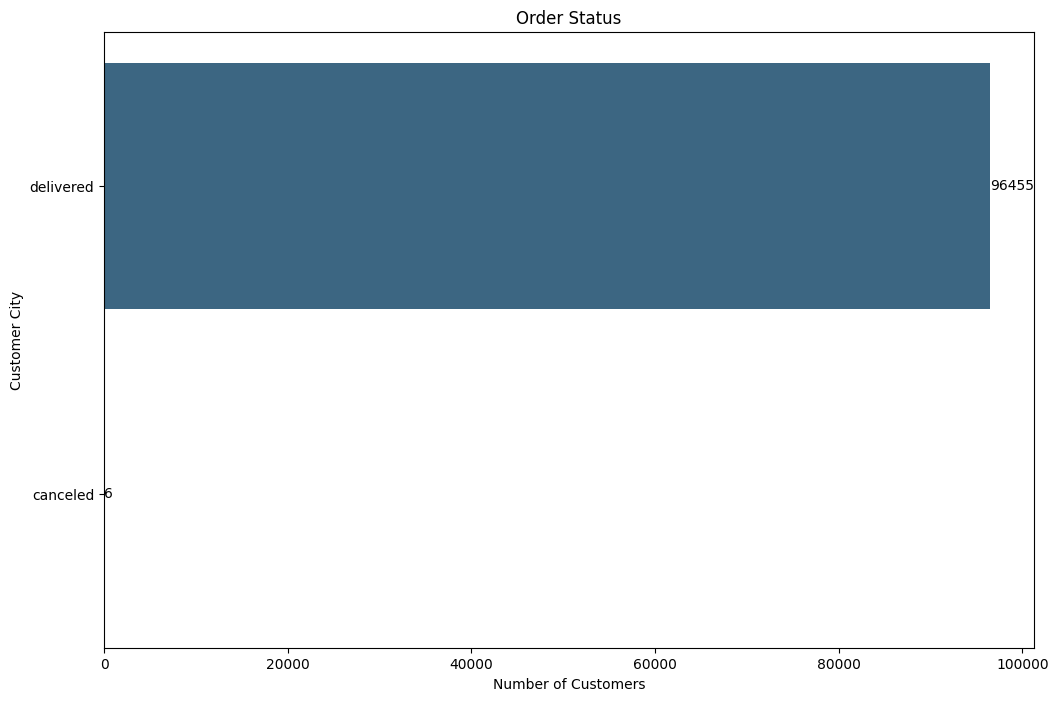

In [60]:
status_or = df_orders_dataset['order_status'].value_counts()

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=status_or.values, y=status_or.index, palette='viridis')
for i in range(len(status_or)):
    plt.text(status_or.values[i], i, status_or.values[i], color='black', ha='left', va='center')
plt.title('Order Status')
plt.xlabel('Number of Customers')
plt.ylabel('Customer City')
plt.show()

**Insight:**
- Pertanyaan 1: Customer paling banyak berasal dari sao paulo pada negara bagian SP
- Pertanyaan 2: Kategri produk yang paling banyak terjual adalah cama_mesa_banho. Sedangkan kategori produk yang paling sedikit terjual adalah seguros_e_servicos
- Pertanyaan 3: Produk yang paling banyak terjual adalah aca2eb7d00ea1a7b8ebd4e68314663af. Sedangkan salah satu produk yang paling sedikit terjual adalah 6f1c4346d1a3630833ef0128e82eb6fb.
- Pertanyaan 4: Puncak tertinggi order dan nilai revenue pada 2017 terjadi pada bulan november.
- Pertanyaan 5: Metode pembayaran yang paling sering digunakan adalah menggunakan kartu kredit.
- Pertanyaan 6: Penjual dengan skor review bintang 5 terbanyak adalah seller 6560211a19b47992c3666cc44a7e94c0. Sedangkan, salah satu penjual dengan skor review bintang 5 paling sedikit adalah seller 56642bcb79900e777d68e91915cb4267.
- Pertanyaan 7: Penjual dengan jumlah skor review bintang 1 lebih banyak daripada bintang 5 adalah seller 6560211a19b47992c3666cc44a7e94c0.
- Pertanyaan 8: Status order paling banyak adalah delivered.

## Analisis Lanjutan (Opsional)

### RMF

In [61]:
rfm_df = df_merged_selling.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", #mengambil tanggal order terakhir
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df =  date(rfm_df,"max_order_timestamp")
save_data(rfm_df, "rfm_df")
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,93.00


In [62]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = df_merged_selling["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,89.80,288
1,000161a058600d5901f007fab4c27140,2017-07-16,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,149.90,378
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,93.00,149


In [63]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288
1,000161a058600d5901f007fab4c27140,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378
4,000379cdec625522490c315e70c7a9fb,1,93.00,149


/tmp/ipykernel_8452/3483176999.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=False).head(5), palette=colors, ax=ax[0])
/tmp/ipykernel_8452/3483176999.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
/tmp/ipykernel_8452/3483176999.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_valu

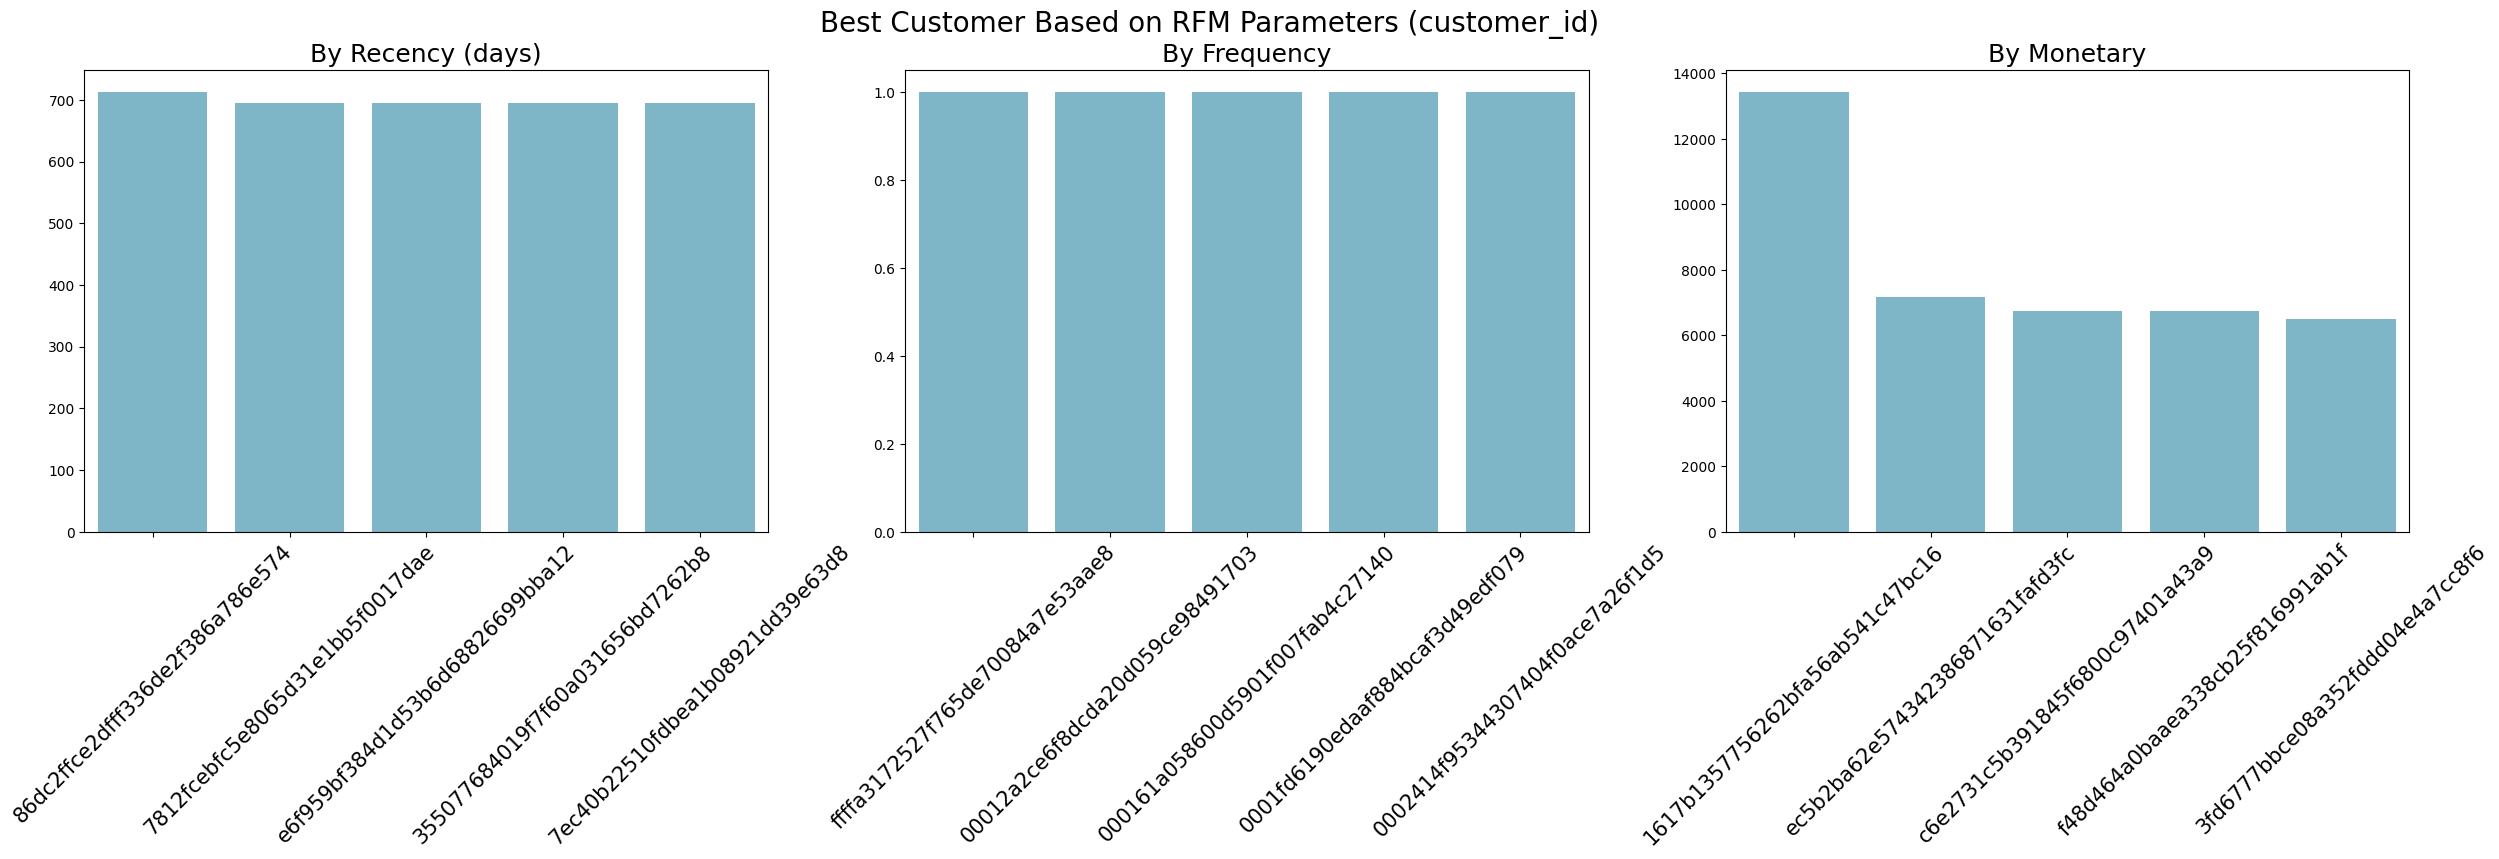

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=45)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis ='x', labelsize=15, rotation=45)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis ='x', labelsize=15, rotation=45)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

#### Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [65]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288,32945.5,48231.0,49426.0
1,000161a058600d5901f007fab4c27140,1,54.90,409,16036.0,48231.0,30662.0
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547,2635.0,48231.0,78483.0
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378,20206.5,48231.0,72196.0
4,000379cdec625522490c315e70c7a9fb,1,93.00,149,64649.5,48231.0,51816.5


In [66]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288,34.155988,100.0,51.239361
1,000161a058600d5901f007fab4c27140,1,54.90,409,16.625197,100.0,31.786940
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547,2.731816,100.0,81.362416
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378,20.948930,100.0,74.844756
4,000379cdec625522490c315e70c7a9fb,1,93.00,149,67.024861,100.0,53.717565


In [67]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.12
1,000161a058600d5901f007fab4c27140,2.43
2,0001fd6190edaaf884bcaf3d49edf079,3.74
3,0002414f95344307404f0ace7a26f1d5,3.69
4,000379cdec625522490c315e70c7a9fb,3.43
5,0004164d20a9e969af783496f3408652,2.51
6,000419c5494106c306a97b5635748086,2.32


#### Segmentasi customer berdasarkan RFM_score

In [68]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.12,Medium value customer
1,000161a058600d5901f007fab4c27140,2.43,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.74,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.69,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.43,Medium value customer
5,0004164d20a9e969af783496f3408652,2.51,Low value customers
6,000419c5494106c306a97b5635748086,2.32,Low value customers
7,00046a560d407e99b969756e0b10f282,3.62,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.81,Low value customers
9,000598caf2ef4117407665ac33275130,4.95,Top customers


In [69]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,15659
1,Low value customers,40554
2,Medium value customer,33736
3,Top customers,5426
4,lost customers,1086


In [70]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

/tmp/ipykernel_8452/1016365800.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


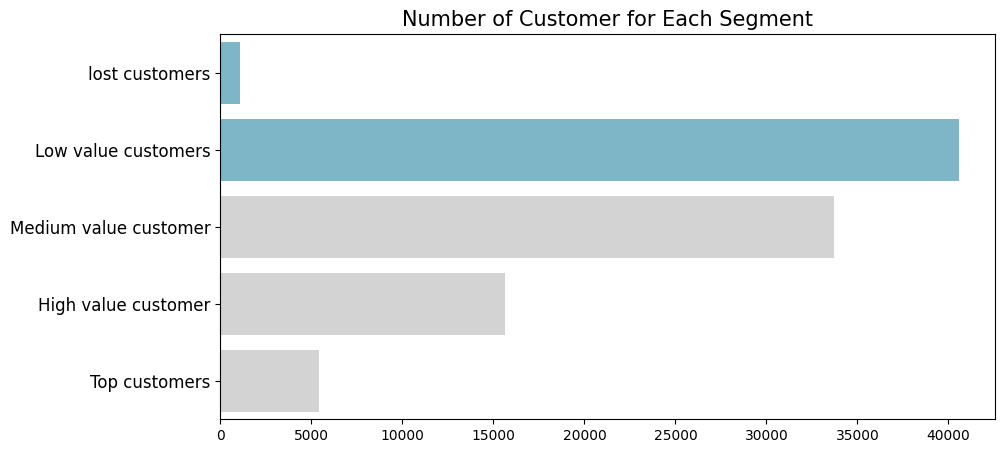

In [71]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

#### Geospatial Analysis

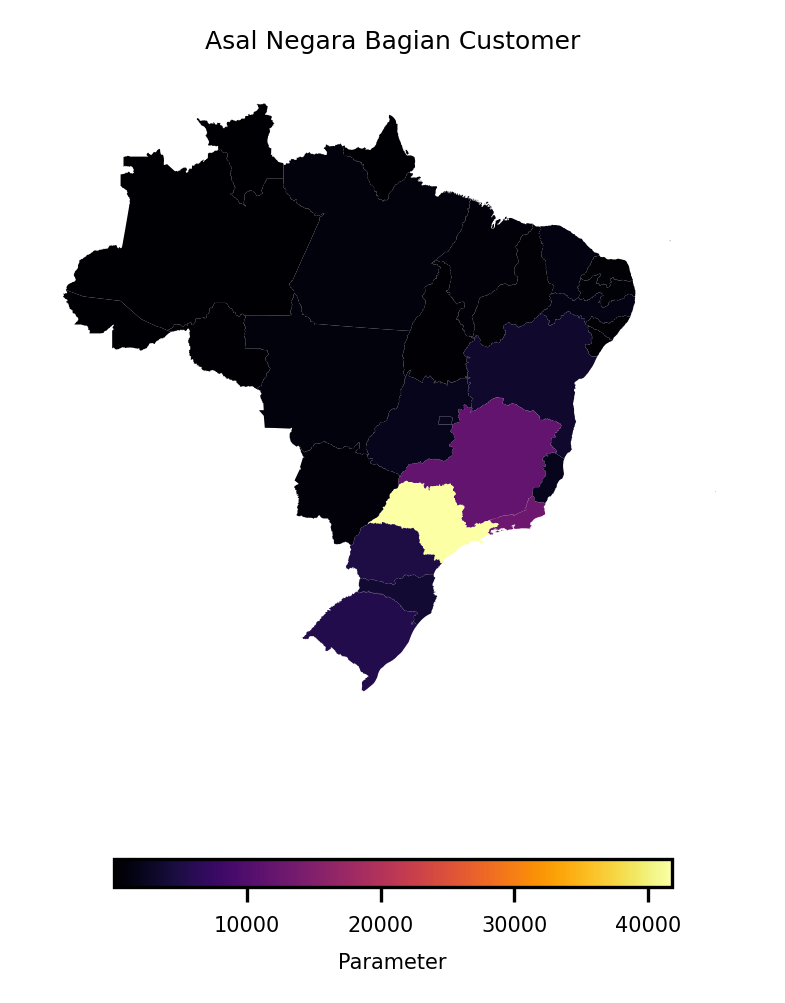

In [72]:
df_states= df_customers_dataset['customer_state'].value_counts().reset_index()
df_states.columns = ['state', 'customer_count']

states = geobr.read_state(year=2019)

states["abbrev_state"] = states["abbrev_state"].str.lower()
df_states["state"] = df_states["state"].str.lower()
brasil = states.merge(df_states, how="left", left_on="abbrev_state", right_on="state")

plt.rcParams.update({"font.size": 5})
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
brasil.plot(
    column="customer_count",
    cmap="inferno",
    legend=True,
    legend_kwds={
        "label": "Parameter",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax,
)

ax.set_title("Asal Negara Bagian Customer")
ax.axis("off")
plt.show()

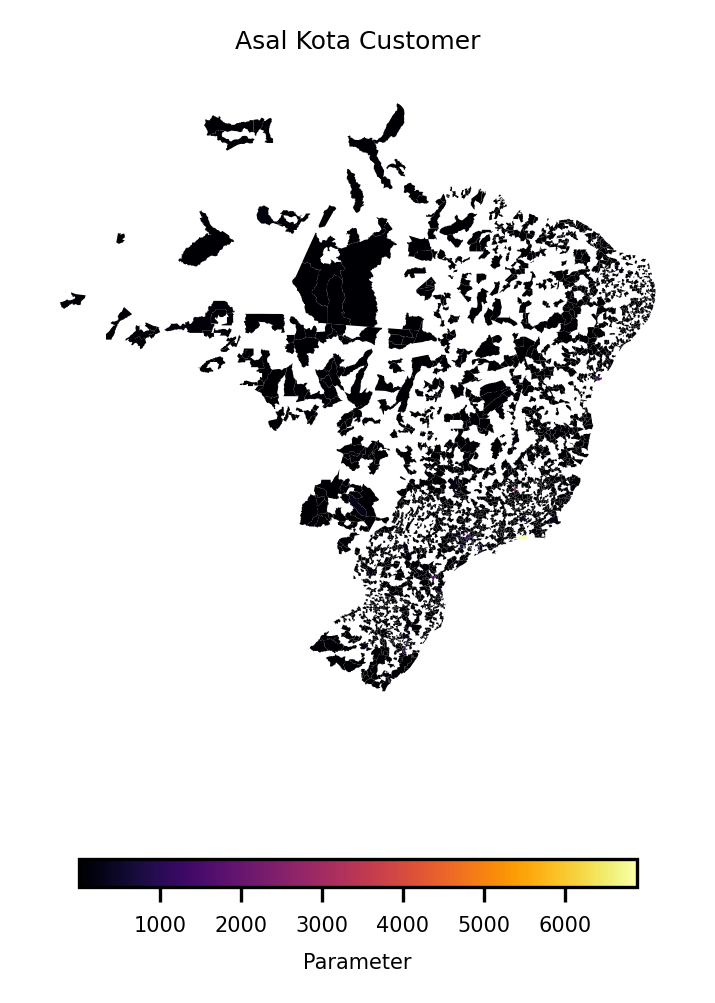

In [73]:
df_cities = df_customers_dataset['customer_city'].value_counts().reset_index()
df_cities.columns = ['customer_city', 'customer_count']

all_city = geobr.read_municipality(year=2019)

all_city["name_muni"] = all_city["name_muni"].str.replace("'", '')
all_city["name_muni"] = all_city["name_muni"].str.lower()
df_cities["customer_city"] = df_cities["customer_city"].str.lower()

all_city = all_city.merge(df_cities, how="left", left_on="name_muni", right_on="customer_city")

plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(4, 4), dpi=300)

all_city.plot(
    column="customer_count",
    cmap="inferno",
    legend=True,
    legend_kwds={
        "label": "Parameter",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax,
)

ax.set_title("Asal Kota Customer")
ax.axis("off")
plt.show()

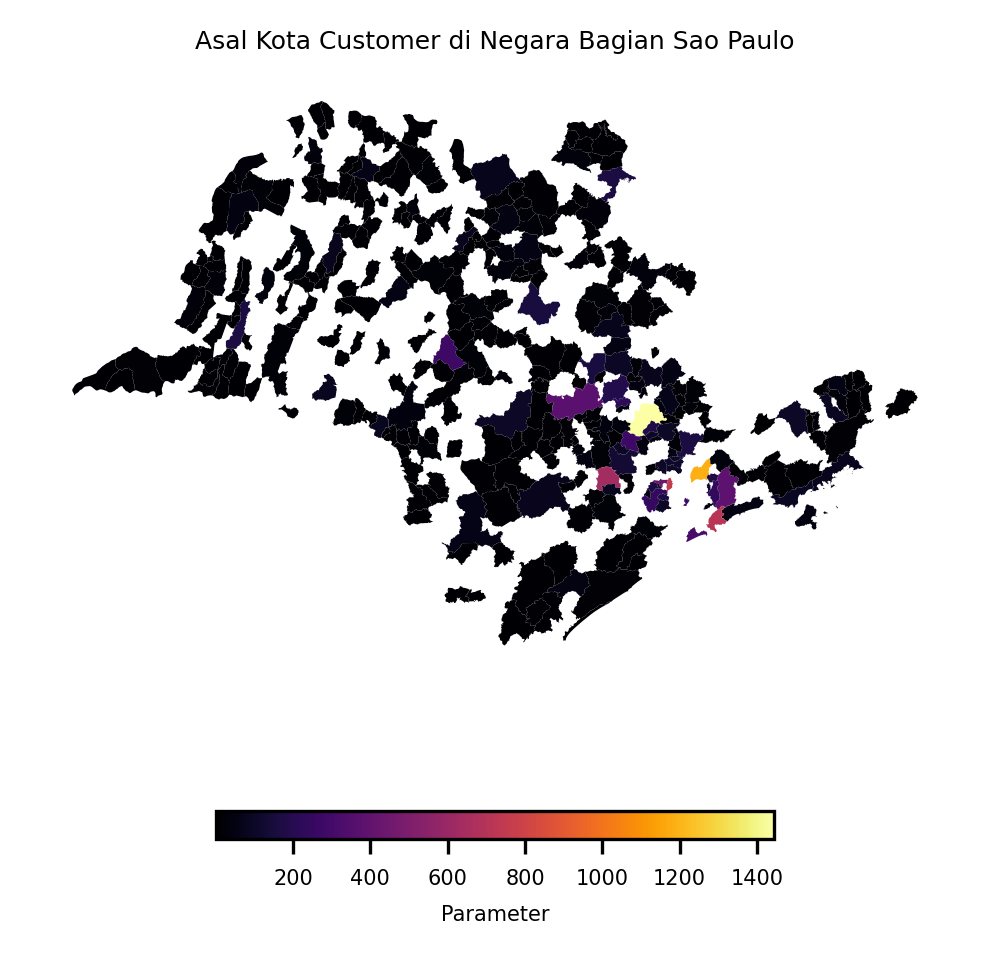

In [74]:
cities = df_customers_dataset['customer_city'].value_counts().reset_index()
cities.columns = ['customer_city', 'customer_count']

sao = geobr.read_municipality(code_muni="SP", year=2019)

sao["name_muni"] = sao["name_muni"].str.replace("'", '')
sao["name_muni"] = sao["name_muni"].str.lower()
cities["customer_city"] = cities["customer_city"].str.lower()

# join the databases
sao = sao.merge(cities, how="left", left_on="name_muni", right_on="customer_city")

plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(4, 4), dpi=300)

sao.plot(
    column="customer_count",
    cmap="inferno",
    legend=True,
    legend_kwds={
        "label": "Parameter",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax,
)

ax.set_title("Asal Kota Customer di Negara Bagian Sao Paulo")
ax.axis("off")
plt.show()

#### Clustering - Manual Grouping by Transaction

In [75]:
# Menghitung jumlah transaksi per pelanggan
jumlah_transaksi_per_pelanggan = df_merged_selling['customer_id'].value_counts().reset_index()
jumlah_transaksi_per_pelanggan.columns = ['customer_id', 'jumlah_transaksi']

# Tetapkan batasan atau kriteria untuk klaster
bins = [0, 5, 15, 20, 25, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High', 'Extremely High']

# Buat klaster pelanggan berdasarkan kriteria
jumlah_transaksi_per_pelanggan['klaster'] = pd.cut(jumlah_transaksi_per_pelanggan['jumlah_transaksi'], bins=bins, labels=labels)

# Tampilkan hasilnya
jumlah_transaksi_per_pelanggan

,customer_id,jumlah_transaksi,klaster
0,fc3d1daec319d62d49bfb5e1f83123e9,21,Very High
1,bd5d39761aa56689a265d95d8d32b8be,20,High
2,be1b70680b9f9694d8c70f41fa3dc92b,20,High
3,10de381f8a8d23fff822753305f71cae,15,Medium
4,adb32467ecc74b53576d9d13a5a55891,15,Medium
...,...,...,...
96456,843fda212b1289268be72a3a6729d776,1,Low
96457,23dadcb549445fa5e15d7bc5cdf682aa,1,Low
96458,b2f7d7a2ae45fa22bc523975c98ea5b8,1,Low
96459,b18406a3ade96967766b9868c6989d5d,1,Low


/tmp/ipykernel_8452/1076167471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.values, y=df.index, palette=colors_)


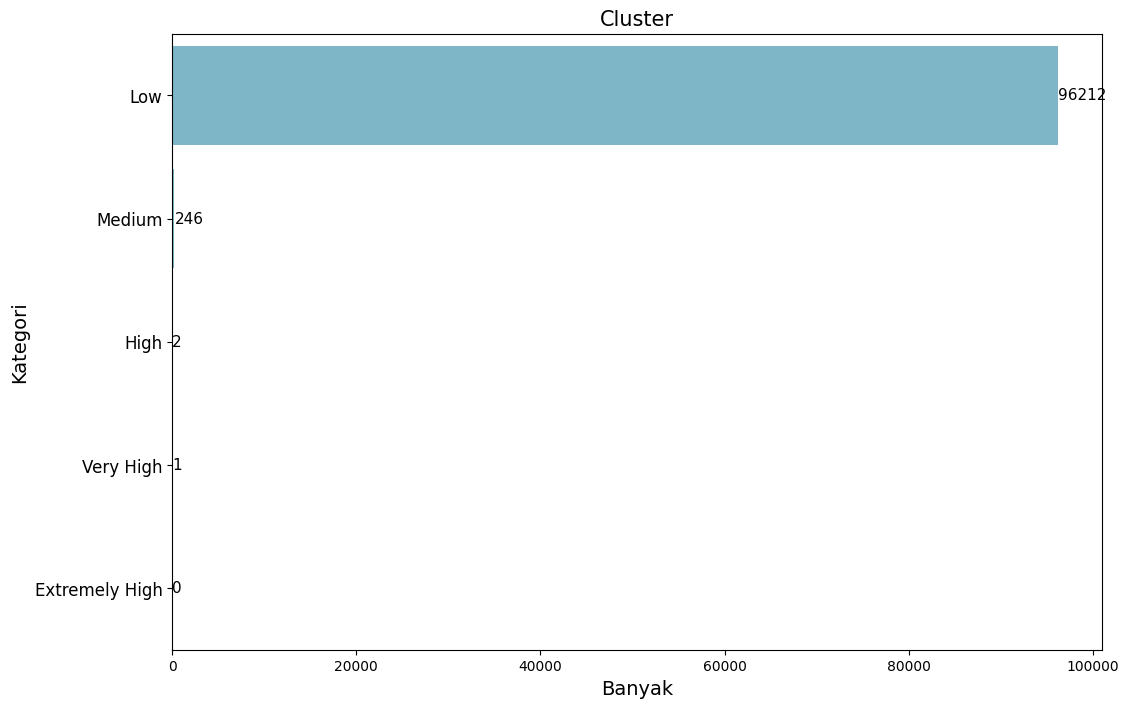

In [76]:
df = jumlah_transaksi_per_pelanggan['klaster'].value_counts()

plt.figure(figsize=(12, 8))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x=df.values, y=df.index, palette=colors_)
for i in range(len(df)):
    plt.text(df.values[i], i, df.values[i], color='black', ha='left', va='center', size=11)
plt.title('Cluster', fontsize=15)
plt.xlabel('Banyak', fontsize=14)
plt.ylabel('Kategori', fontsize=14)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
- Berdasarkan skor RMF, mayoritas customer dikategorikan sebagai Low value customers dengan jumlah mencapai 40 ribuan. Sedangkan untuk kategori Top customers berjumlah 5 ribuan.
- Berdasarkan geospatial analysis, wilayah dengan warna gelap adalah wilayah dengan jumlah sedikit. Sedangkan untuk wilayah warna cream adalah wilayah dengan customer terbanyak. Untuk wilayah warna putih menunjukkan bahwa tidak ada customer yang berasal dari wilayah tersebut.
- Meskipun negara bagian sao paulo memilki customer terbanyak, tetapi tidak semua kota terdapat customer.
- Untuk clustering dilakukan manual menggunakan jumlah transaksi yang dilakukan oleh customer.

## Conclusion

- Conclution pertanyaan 1: Berdasarkan demografi customer, negara bagian sao paulo memilki jumlah customer terbanyak, terutama di kota sao paulo. Hal tersebut menunjukkan bahwa minat belanja masyarakat di negara bagian sao paulo begitu tinggi. Campaign yang mungkin dilakukan di negara bagian tersebut cukup sukses dan berhasil menarik minat masyarakat, sehingga campaigh tersebut bisa diterapkan di kota-kota besar lainnya agar jumlah customer bisa lebih banyak. Selain itu, faktor jumlah penduduk juga memengaruhi tingginya jumlah customer di suatu wilayah.
- Conclution pertanyaan 2: Kategori produk yang paling banyak terjual adalah kategori rumah tangga yang mencapai 11 ribu produk yang terjual. Sedangkan kategori produk yang sedikit terjual adalah layanan asuransi. Hal tersebut menunjukkan bahwa minat customer untuk mengikuti asuransi begitu rendah, sehingga layanan asuransi bisa dioptimalkan lebih baik lagi agar bisa menarik customer yang lebih banyak.
- Conclution pertanyaan 3: Produk dengan penjualan tertinggi adalah produk aca2eb7d00ea1a7b8ebd4e68314663af, menunjukkan bahwa minat masyarakat begitu tinggi terhadap produk tersebut. Sedangkan masyarakat kurang minat terhadap salah satu produk seperti produk 6f1c4346d1a3630833ef0128e82eb6fb.
- Conclution pertanyaan 4: Nilai revenue dan order pada tahun 2017 cenderung mengalami kenaikan, puncaknya terjadi pada bulan november. Hal tersebut menunjukkan bahwa bisnis tersebut mengalami pertumbuhan dari waktu ke waktu.
- Conclution pertanyaan 5: Minat customer terhadap pembayaran menggunakan kartu kredit sangat banyak. Hal tersebut menunjukkan bahwa manfaat kartu kredit sangat menarik banyak customer atau masyarakat. 
- Conclution pertanyaan 6: Dari bar chart tersebut dapat diketahui seller mana yang perlu diberi reward atas kinerja seller tersebut. Selain itu dialkukan analisis dan evaluasi terhadapt seller yang memiliki bintang 5 hanya 1.
- Conclution pertanyaan 7: Dari bar chart tersebut dapat diketahui seller mana yang redfalg karena jumlah bintang 1 lebih banyak dibanding bintang 5. Selain itu, seller tersebut bisa dibenned jika terbukti melakukan kecurangan atau penipuan.
- Conclution pertanyaan 8: Status pesanan mayoritas sudah terkirim ke customer. Status cancel mungkin bisa terjadi karena pembatalan yang dilakukan oleh customer itu sendiri atau bisa terjadi karena pengembalian barang yang rusak atau tidak sesuai.

## Simpan library 

In [77]:
installed_packages = {pkg.key for pkg in pkg_resources.working_set}

# Menyimpan nama library beserta versi yang digunakan ke file requirements.txt
with open('/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/requirements.txt', 'w') as f:
    for package in sorted(installed_packages):
        version = pkg_resources.get_distribution(package).version
        f.write(f"{package}=={version}\n")